<a href="https://colab.research.google.com/github/NidhiJoshi1T/stock-price-prediction/blob/main/stock_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.layers import LSTM, Dense, Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential

In [37]:
stock_data=pd.read_csv("/content/drive/MyDrive/NFLX.csv",index_col='Date')
stock_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-09,200.649994,201.690002,192.539993,192.770004,192.770004,6949000
2022-06-10,182.639999,185.860001,180.850006,182.940002,182.940002,13065600
2022-06-13,177.070007,179.089996,168.960007,169.690002,169.690002,10222400
2022-06-14,169.750000,172.059998,164.279999,167.539993,167.539993,11555300
2022-06-15,169.259995,183.850006,168.529999,180.110001,180.110001,12396000


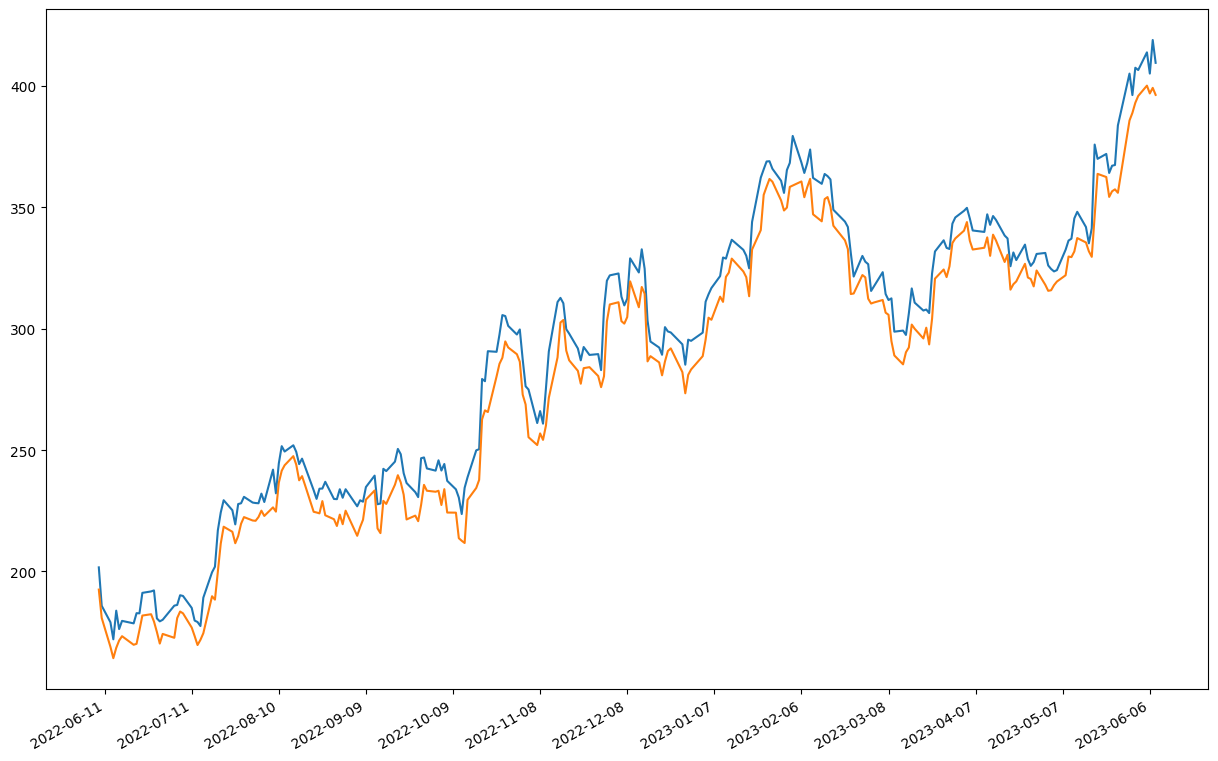

In [38]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
x_dates= [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]
plt.plot(x_dates,stock_data['High'],label="high")
plt.plot(x_dates,stock_data['Low'],label="low")
plt.gcf().autofmt_xdate()

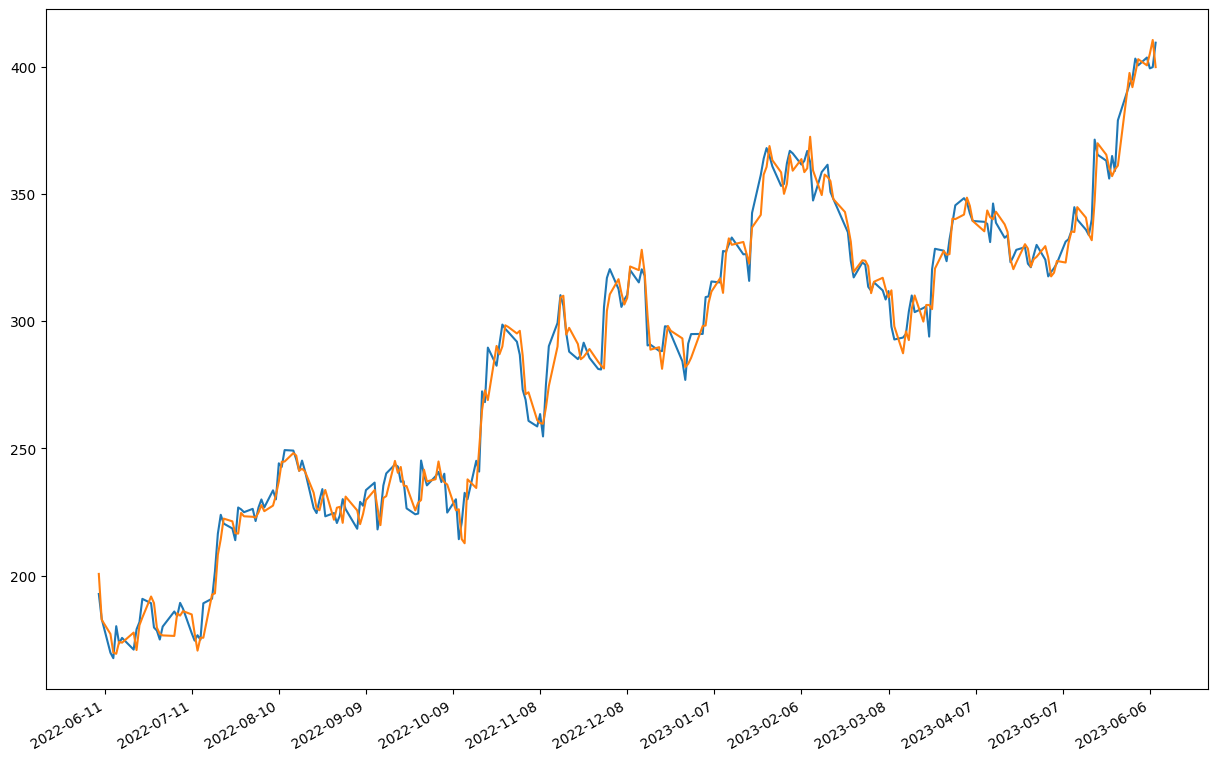

In [39]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
x_dates= [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]
plt.plot(x_dates,stock_data['Close'],label="Close")
plt.plot(x_dates,stock_data['Open'],label="Open")
plt.gcf().autofmt_xdate()


In [40]:
y_target=stock_data['Close']
x=stock_data.iloc[:,0:4]


In [41]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x.values)
x_scaled=pd.DataFrame(columns=x.columns, data=x_scaled,index=x.index)

In [42]:
def lstm_split(data,n_steps):
  X,y=[] ,[]
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i+n_steps,:-1])
    y.append(data[i+n_steps-1,-1])
  return np.array(X), np.array(y) 

In [43]:
X1,y1=lstm_split(x_scaled.values,2)
split_idx=int(np.ceil(len(X1)*0.8))
date_idx=x_scaled.index
X_train, X_test=X1[:split_idx], X1[split_idx:]
y_train, y_test=y1[:split_idx], y1[split_idx:]
X_train_date,X_test_date=date_idx[:split_idx],date_idx[split_idx:]


In [44]:
lstm=Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1],X_train.shape[2]),activation='relu',return_sequences=True))
lstm.add(Flatten())
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error',optimizer='adam')
lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 32)             4608      
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [45]:
history=lstm.fit(X_train, y_train, epochs=100,batch_size=4,verbose=1,shuffle=False)

Epoch 1/100
50/50 [==============================] - 2s 3ms/step - loss: 0.9073
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5619
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1989
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0335
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 11/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 12/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 13/100
50/50 [=================

In [46]:
y_pred=lstm.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [47]:
rmse=mean_squared_error(y_test,y_pred,squared=False)
mae=mean_absolute_percentage_error(y_test,y_pred)
print("RMSE: ",rmse)
print("MAE: ",mae)


RMSE:  0.08190242779641944
MAE:  0.05286028185197354
